Operator `initdamp` ran in 0.01 s


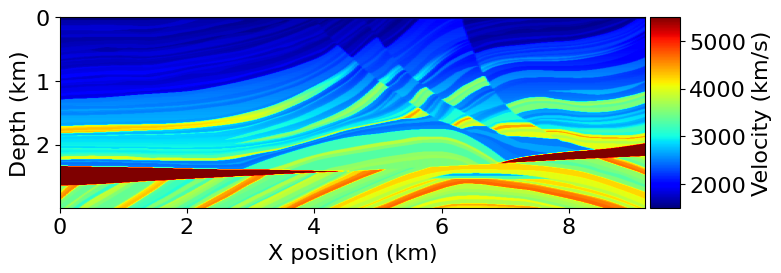

In [1]:
from examples.seismic import Model, plot_velocity
from devito import *
import numpy as np

nx = 369
nz = 375
nbl = 40
space_order = 8
dtype = np.float32
shape = (nx, nz)
spacing = (25., 8.)
origin = (0., 0.)



v = np.empty(shape, dtype=dtype)


path = "/home/joao/Downloads/RTM_basic/model-375.cwp"
a = open(path)
v = np.fromfile(a, dtype=dtype).reshape([nx, nz])
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=space_order, nbl=nbl, bcs="damp")

plot_velocity(model)


Operator `initdamp` ran in 0.01 s


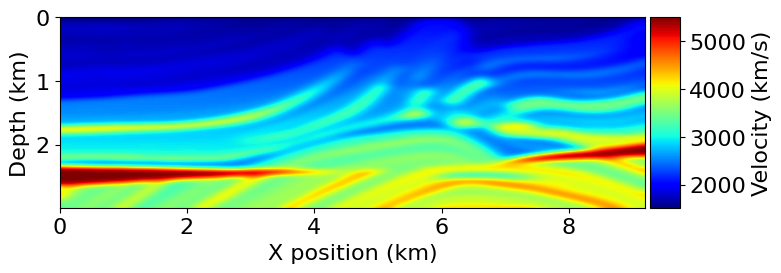

In [2]:
model0 = Model(space_order=space_order, vp=v,   
                           origin=origin, shape=shape, spacing=spacing, 
                           nbl=nbl)
filter_sigma = (5, 5)
gaussian_smooth(model0.vp, sigma=filter_sigma)

plot_velocity(model0)

In [3]:
from examples.seismic import TimeAxis

t0 = 0. 
tn = 5000.
dt = 0.0008
f0 = 0.065
time_range = TimeAxis(start = t0, stop = tn, step = dt)



In [4]:
from examples.seismic import RickerSource

f0 = 0.0065 
src = RickerSource(name='src', grid=model.grid, f0=f0, npoint=1, time_range=time_range)
src.coordinates.data[0, :] = np.array(model.domain_size) * .5
src.coordinates.data[0, -1] = 1.


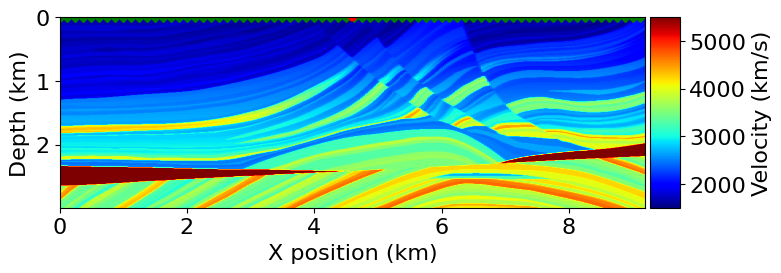

In [5]:
from examples.seismic import Receiver

rec_coordinates = np.empty((model.shape[0], 2))
rec_coordinates[:, 0] = np.linspace(0, model.domain_size[0], num=model.shape[0])
rec_coordinates[:, 1] = 1.

plot_velocity(model, source=src.coordinates.data,receiver=rec_coordinates[::5,:])

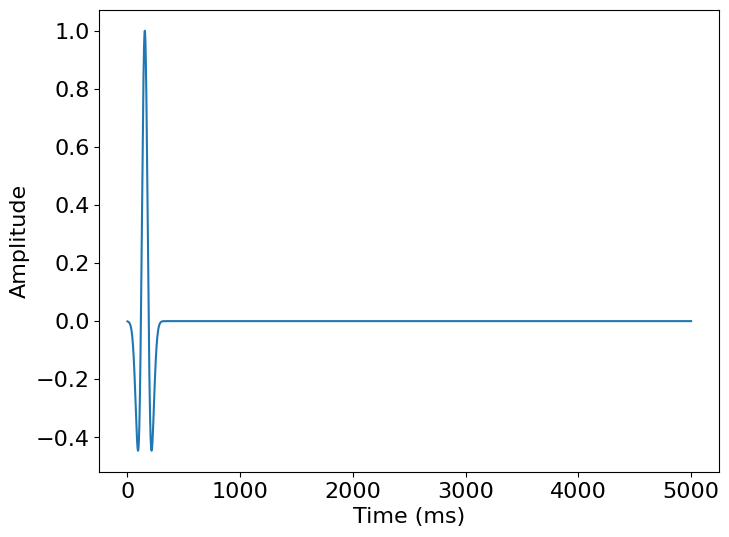

In [6]:
from examples.seismic import AcquisitionGeometry

geometry = AcquisitionGeometry(model, rec_coordinates, src.coordinates.data, t0, tn, f0=.0065, src_type='Ricker')
geometry.src.show()

In [ ]:
from examples.seismic.acoustic import AcousticWaveSolver
from examples.seismic import plot_shotrecord

solver = AcousticWaveSolver(model, geometry, space_order=8)
true_d= solver.forward(vp=model.vp)

smooth_d= solver.forward(vp=model.vp)


plot_shotrecord(smooth_d.data - true_d.data, model, t0, tn)